<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 141.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 168.1 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 126.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 126.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 134.6 MB/s eta 0:00:00


In [3]:
!pip install seaborn

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [4]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2025-12-02 11:32:07--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  65.8MB/s    in 2.3s    

2025-12-02 11:32:10 (65.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



#### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sqlite3

#### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")
conn = sqlite3.connect('sur_data.sqlite')
df.to_sql('main', if_exists='replace', con=conn, index=False)

65437

#### Display the first few rows to understand the structure of the data


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


In [7]:
## Write your code here
QUERY = """
    SELECT ConvertedCompYearly, Age
    FROM main
    WHERE ConvertedCompYearly IS NOT NULL
    AND Age IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
df

,ConvertedCompYearly,Age
0,7322.0,18-24 years old
1,30074.0,25-34 years old
2,91295.0,35-44 years old
3,53703.0,35-44 years old
4,110000.0,25-34 years old
...,...,...
23430,44640.0,25-34 years old
23431,170000.0,45-54 years old
23432,116844.0,35-44 years old
23433,12000.0,18-24 years old


In [8]:
## removing outliers
q1 = df['ConvertedCompYearly'].quantile(0.25)
q3 = df['ConvertedCompYearly'].quantile(0.75)
iqr = q3 - q1
bound_low = q1 - 1.5 * iqr
bound_hig = q3 + 1.5 * iqr
df = df[(df['ConvertedCompYearly'] >= bound_low) & (df['ConvertedCompYearly'] <= bound_hig)]

In [9]:
df_plot = df.groupby('Age')['ConvertedCompYearly'].mean()
df_plot

Age
18-24 years old        35501.307422
25-34 years old        65634.244707
35-44 years old        87271.634750
45-54 years old        97710.711825
55-64 years old       108063.488491
65 years or older     103414.204724
Prefer not to say     134103.750000
Under 18 years old     15155.888889
Name: ConvertedCompYearly, dtype: float64

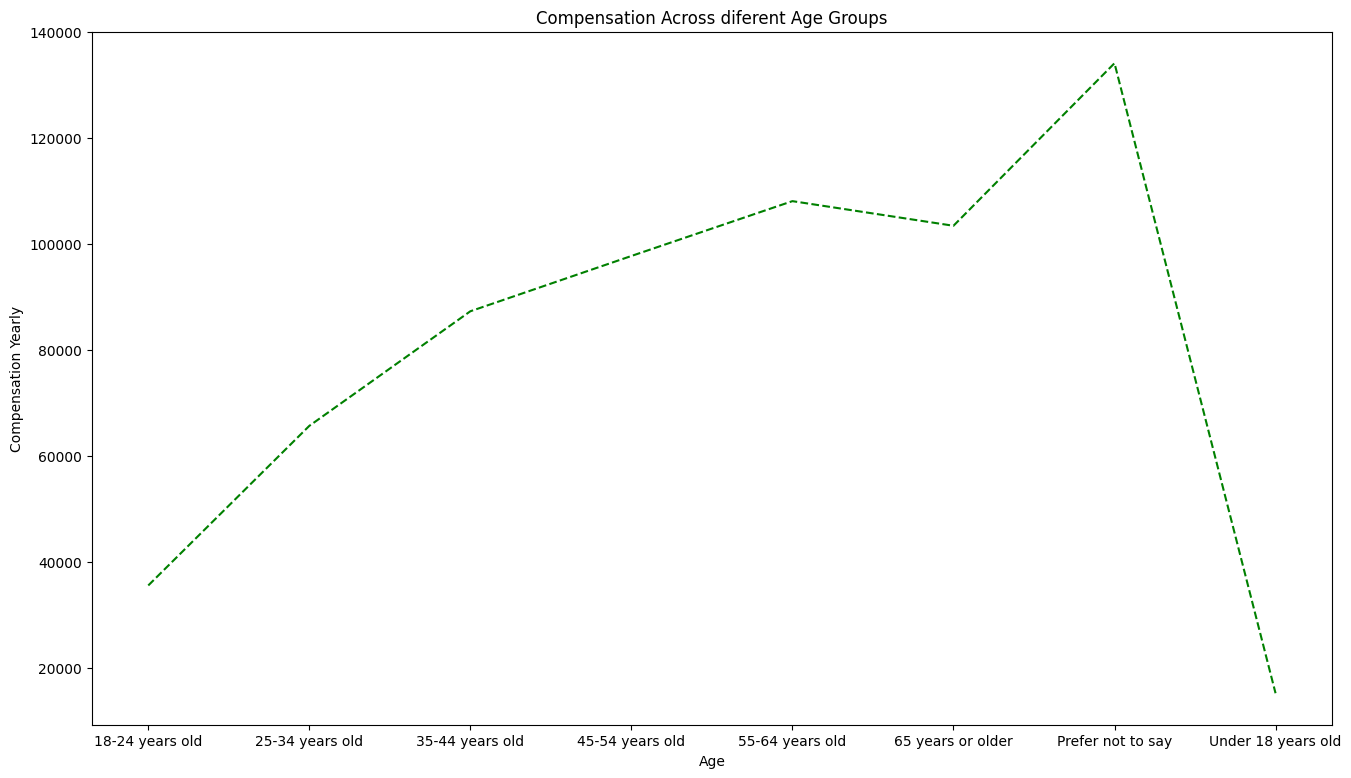

In [10]:
plt.figure(figsize=(16, 9))
df_plot.plot(kind='line', color='green', linestyle='--')
plt.title('Compensation Across diferent Age Groups')
plt.ylabel('Compensation Yearly')
plt.show()

##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


In [11]:
## Write your code here
df_plot = df[(df['Age'] == '25-34 years old') | (df['Age'] == '35-44 years old')]
df_plot = df_plot.groupby('Age')['ConvertedCompYearly'].mean()
df_plot

Age
25-34 years old    65634.244707
35-44 years old    87271.634750
Name: ConvertedCompYearly, dtype: float64

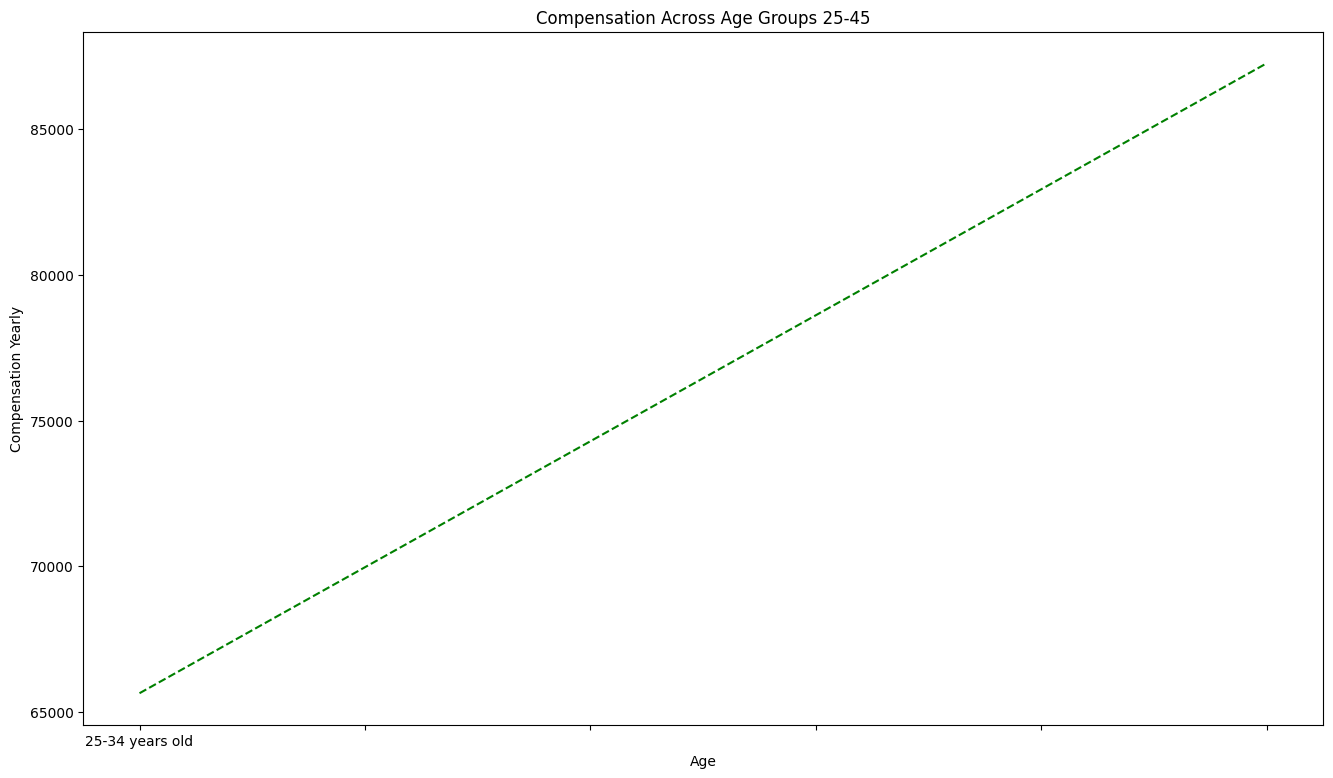

In [12]:
plt.figure(figsize=(16, 9))
df_plot.plot(kind='line', color='green', linestyle='--')
plt.title('Compensation Across Age Groups 25-45')
plt.ylabel('Compensation Yearly')
plt.show()

### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


In [19]:
## Write your code here
QUERY = """
    SELECT JobSatPoints_6, YearsCodePro
    FROM main
    WHERE JobSatPoints_6 IS NOT NULL
    AND YearsCodePro IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
df

,JobSatPoints_6,YearsCodePro
0,0.0,17
1,30.0,12
2,0.0,27
3,60.0,10
4,100.0,Less than 1 year
...,...,...
28614,0.0,2
28615,0.0,17
28616,60.0,2
28617,0.0,7


In [20]:
df['YearsCodePro'].unique()

array(['17', '12', '27', '10', 'Less than 1 year', '18', '15', '6', '7',
       '16', '14', '4', '8', '2', '29', '5', '30', '1', '25', '24', '26',
       '9', '20', '37', '11', '3', '13', '19', '21', '23', '34', '28',
       '32', '22', '33', '40', '39', '31', '35', '41', '38',
       'More than 50 years', '36', '43', '42', '50', '45', '44', '46',
       '48', '47', '49'], dtype=object)

In [22]:
df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year': 0.5, 'More than 50 years': 55}).astype('float')
df_plot = df.sort_values('YearsCodePro', ascending=True).groupby('YearsCodePro')['JobSatPoints_6'].mean()
df_plot

YearsCodePro
0.5     22.012899
1.0     25.105109
2.0     27.254830
3.0     26.324125
4.0     27.359300
5.0     25.324119
6.0     25.266686
7.0     26.193101
8.0     25.252022
9.0     24.588718
10.0    24.133230
11.0    23.775309
12.0    24.186774
13.0    24.314972
14.0    23.603968
15.0    24.046277
16.0    22.754325
17.0    22.542857
18.0    23.655303
19.0    25.071704
20.0    21.844471
21.0    21.645161
22.0    23.000000
23.0    19.848633
24.0    22.046110
25.0    20.231827
26.0    20.360656
27.0    19.774648
28.0    21.133721
29.0    21.474747
30.0    21.526480
31.0    19.962963
32.0    24.700000
33.0    21.591549
34.0    23.458333
35.0    23.674797
36.0    20.859375
37.0    17.409091
38.0    20.150943
39.0    25.172414
40.0    21.087912
41.0    32.227273
42.0    19.166667
43.0    18.375000
44.0    17.857143
45.0    23.133333
46.0    25.000000
47.0    25.000000
48.0    27.000000
49.0    27.500000
50.0     5.000000
55.0    18.250000
Name: JobSatPoints_6, dtype: float64

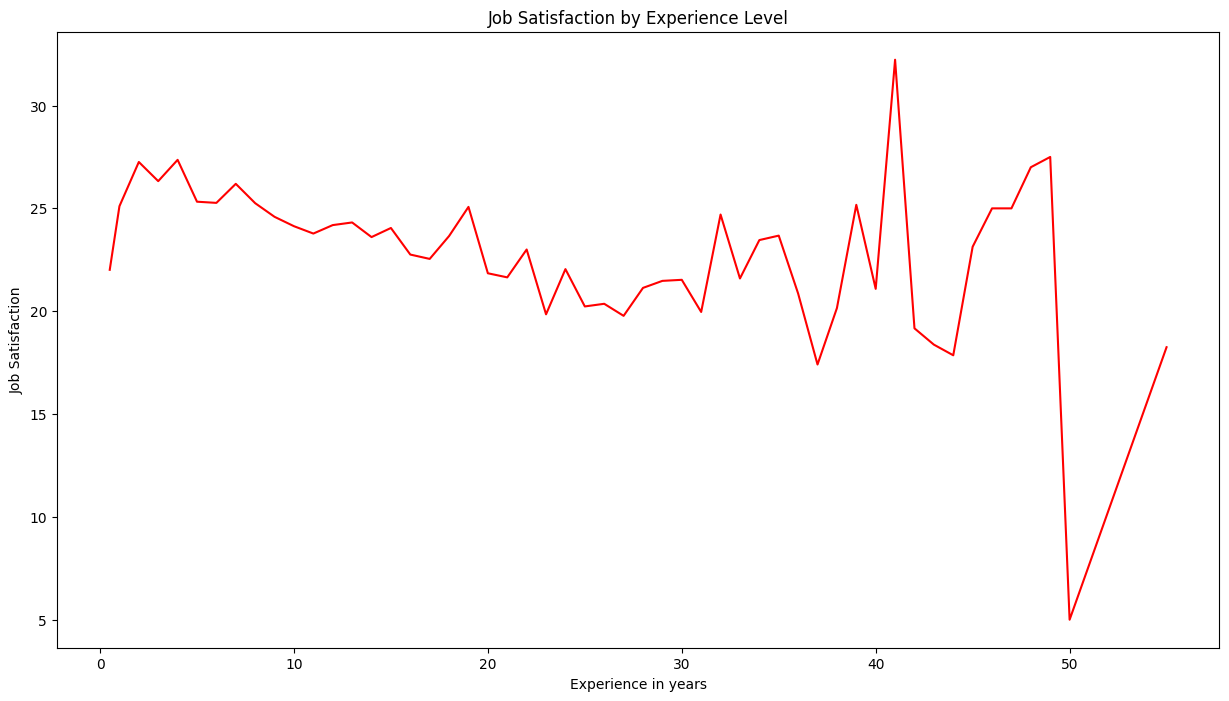

In [23]:
plt.figure(figsize=(15, 8))
df_plot.plot(kind='line', color='red')
plt.title('Job Satisfaction by Experience Level')
plt.xlabel('Experience in years')
plt.ylabel('Job Satisfaction')
plt.show()

### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


In [24]:
## Write your code here
QUERY = """
    SELECT ConvertedCompYearly, WorkExp
    FROM main
    WHERE ConvertedCompYearly IS NOT NULL
    AND WorkExp IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
df

,ConvertedCompYearly,WorkExp
0,7322.0,3.0
1,91295.0,7.0
2,110000.0,8.0
3,161044.0,18.0
4,195000.0,30.0
...,...,...
16139,9711.0,2.0
16140,44640.0,3.0
16141,170000.0,30.0
16142,12000.0,1.0


In [25]:
## removing outliers
q1 = df['ConvertedCompYearly'].quantile(0.25)
q3 = df['ConvertedCompYearly'].quantile(0.75)
iqr = q3 - q1
bound_low = q1 - 1.5 * iqr
bound_hig = q3 + 1.5 * iqr
df = df[(df['ConvertedCompYearly'] >= bound_low) & (df['ConvertedCompYearly'] <= bound_hig)]

In [27]:
df_plot = df.groupby('WorkExp')['ConvertedCompYearly'].mean()
df_plot

WorkExp
0.0      22699.475610
1.0      30453.986301
2.0      38159.435283
3.0      42281.418930
4.0      49688.523337
5.0      57208.501279
6.0      65040.691454
7.0      68865.911565
8.0      75455.275943
9.0      79362.055769
10.0     78736.838649
11.0     85195.668966
12.0     85592.402458
13.0     85713.670130
14.0     88276.403727
15.0     88128.920530
16.0     95456.727869
17.0     98186.342508
18.0     96357.612676
19.0    101100.804878
20.0     91864.283096
21.0     92556.763158
22.0    101433.942675
23.0    102727.108696
24.0    103676.638298
25.0    106417.232432
26.0    104228.991525
27.0    105103.617021
28.0    112179.865979
29.0    102917.269231
30.0    106593.736041
31.0     93844.153846
32.0    107459.045455
33.0    117352.875000
34.0    121998.818182
35.0    106552.330097
36.0    103053.322581
37.0    111324.434783
38.0    106221.480000
39.0     94584.461538
40.0    122341.385965
41.0    115453.941176
42.0    130837.035714
43.0    102629.941176
44.0    117224.250000
45

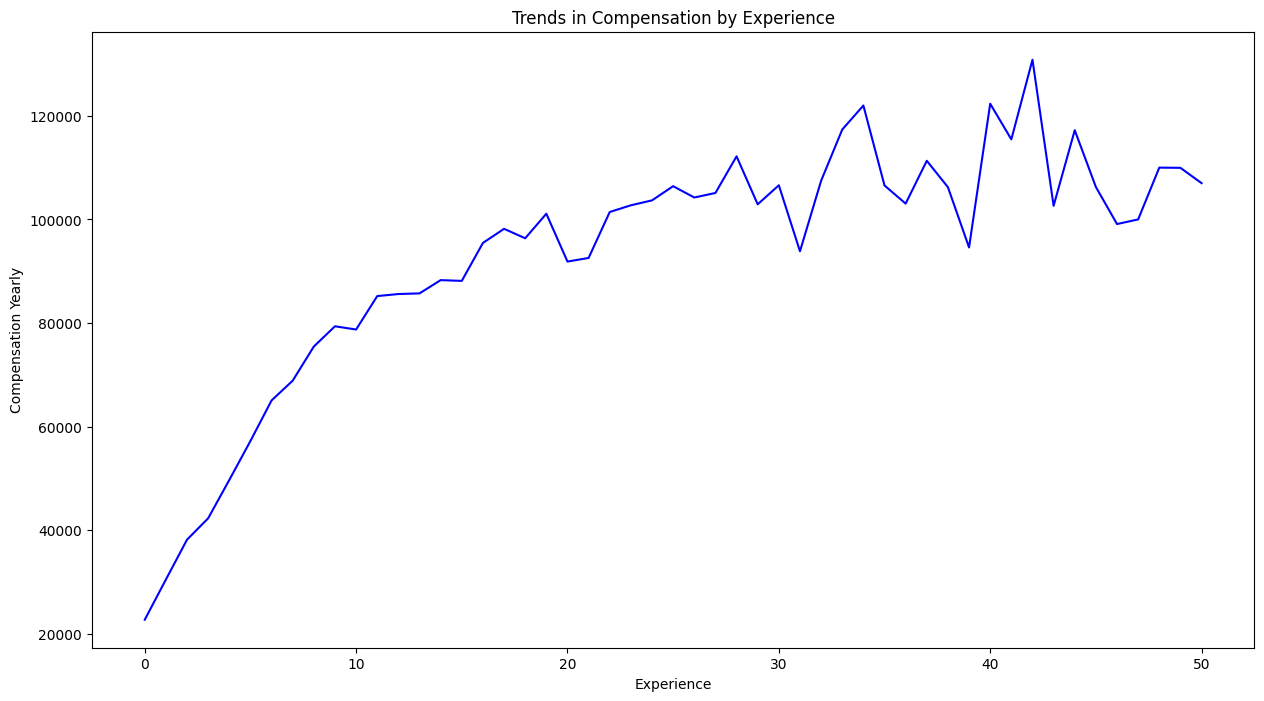

In [28]:
plt.figure(figsize=(15, 8))
df_plot.plot(kind='line', color='blue')
plt.title('Trends in Compensation by Experience')
plt.ylabel('Compensation Yearly')
plt.xlabel('Experience')
plt.show()

##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


In [29]:
## Write your code here
QUERY = """
    SELECT JobSatPoints_6, WorkExp
    FROM main
    WHERE JobSatPoints_6 IS NOT NULL
    AND WorkExp IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
df

,JobSatPoints_6,WorkExp
0,0.0,17.0
1,25.0,15.0
2,30.0,12.0
3,0.0,29.0
4,60.0,12.0
...,...,...
29243,0.0,18.0
29244,0.0,24.0
29245,60.0,2.0
29246,0.0,7.0


In [30]:
df_plot = df.groupby('WorkExp')['JobSatPoints_6'].mean()
df_plot

WorkExp
0.0     19.661290
1.0     24.872378
2.0     26.852767
3.0     26.977892
4.0     26.776699
5.0     26.363659
6.0     25.294084
7.0     26.471383
8.0     25.528990
9.0     24.804325
10.0    24.213609
11.0    24.076923
12.0    24.482982
13.0    23.333333
14.0    24.407609
15.0    22.847791
16.0    22.277311
17.0    22.652462
18.0    23.292388
19.0    23.149847
20.0    22.210996
21.0    22.286290
22.0    22.283912
23.0    20.740602
24.0    21.060526
25.0    20.705071
26.0    20.560000
27.0    21.056338
28.0    20.263158
29.0    18.793103
30.0    19.707692
31.0    20.123457
32.0    23.747475
33.0    21.066667
34.0    21.821429
35.0    20.134884
36.0    26.454545
37.0    21.423729
38.0    17.400000
39.0    27.638889
40.0    21.043165
41.0    19.444444
42.0    21.893617
43.0    24.205882
44.0    21.562500
45.0    24.288889
46.0    29.083333
47.0    27.000000
48.0    27.857143
49.0    21.250000
50.0    15.566038
Name: JobSatPoints_6, dtype: float64

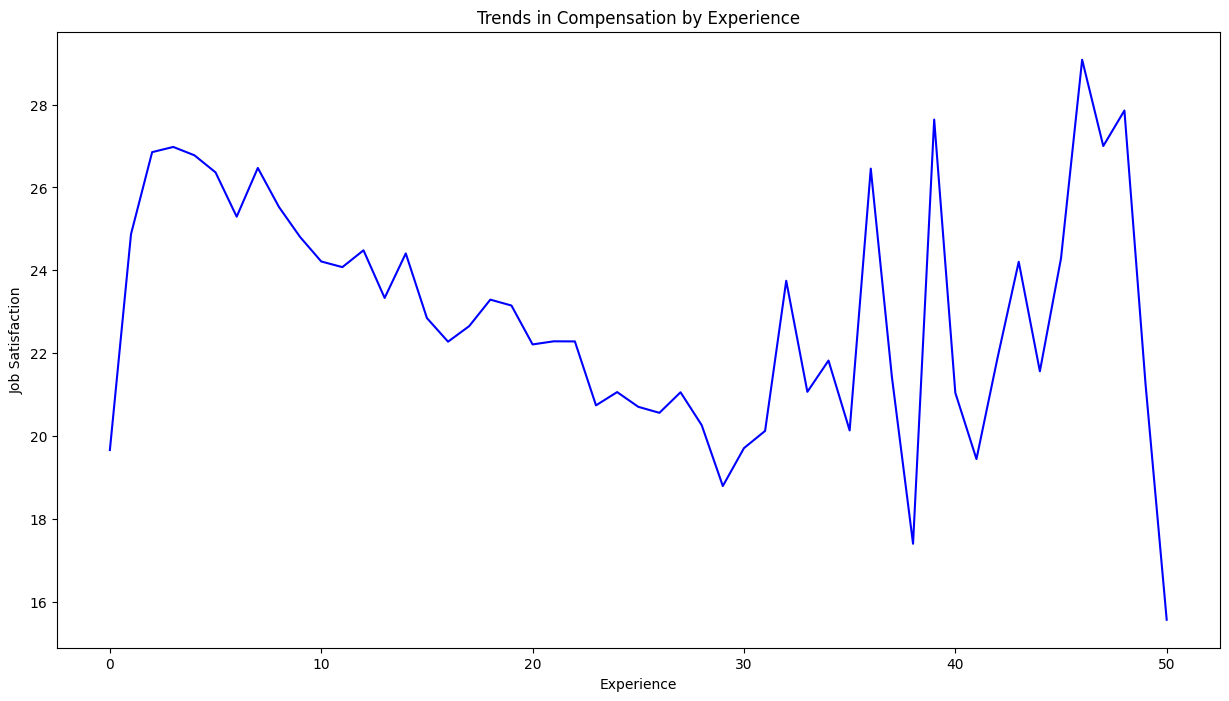

In [31]:
plt.figure(figsize=(15, 8))
df_plot.plot(kind='line', color='blue')
plt.title('Trends in Compensation by Experience')
plt.ylabel('Job Satisfaction')
plt.xlabel('Experience')
plt.show()

In [32]:
conn.close()

#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
